## Importing Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


## Loading dataset and understanding it

In [73]:
df = pd.read_csv('Forbes Billionaire 2020.csv')

### Looking at top 5 rows 

In [74]:
df.head()

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology


In [75]:
df.tail()

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49,Technology
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65,Manufacturing
2752,Zhao Meiguang,1.0,China,gold mining,2674,58,Metals & Mining
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58,Diversified
2754,Zhou Wei family,1.0,China,Software,2674,54,Technology


In [76]:
# Categorical variables -> Name,Country,Source,Industry
# Numerical variables -> NetWorth in billions, Rank, Age

### Dimension of Data

In [80]:
df.shape

(2755, 7)

In [81]:
df.size

19285

In [82]:
df.columns

Index(['Name', 'NetWorth in billions', 'Country', 'Source', 'Rank', 'Age',
       'Industry'],
      dtype='object')

### Datatypes of all the fields in the data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2755 non-null   object 
 1   NetWorth in billions  2755 non-null   float64
 2   Country               2755 non-null   object 
 3   Source                2755 non-null   object 
 4   Rank                  2755 non-null   int64  
 5   Age                   2755 non-null   int64  
 6   Industry              2755 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.8+ KB


### Checking for missing values

In [85]:
df.isnull().sum().sum()

0

In [86]:
df.isnull().sum(axis=0)

Name                    0
NetWorth in billions    0
Country                 0
Source                  0
Rank                    0
Age                     0
Industry                0
dtype: int64

### Check for duplicated rows

In [87]:
df.duplicated().sum()

0

In [88]:
df[df.duplicated("Name")]

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
1625,Robert Miller,2.0,Canada,electronics components,1580,75,Technology
1919,Wang Yanqing & family,1.7,China,carbon fiber products,1833,74,Manufacturing
1976,Li Li,1.6,China,pharmaceuticals,1931,57,Healthcare


In [89]:
#Investigating duplicated names further
df.loc[df["Name"] == "Li Li"]

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
693,Li Li,4.2,China,healthcare,680,55,Healthcare
1976,Li Li,1.6,China,pharmaceuticals,1931,57,Healthcare


### Encoding Categorical Variables

In [90]:
df["Industry"].unique()

array(['Technology', 'Automotive', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Food & Beverage',
       'Telecom', 'Media & Entertainment', 'Service',
       'Gambling & Casinos', 'Manufacturing', 'Real Estate',
       'Metals & Mining', 'Energy', 'Logistics', 'Healthcare',
       'Construction & Engineering', 'Sports'], dtype=object)

In [91]:
industry_encode = {
    'Technology':0, 
    'Automotive':1, 
    'Fashion & Retail':2,
    'Finance & Investments':3, 
    'Diversified':4, 
    'Food & Beverage':5,
    'Telecom':6, 
    'Media & Entertainment':7, 
    'Service':8,
    'Gambling & Casinos':9, 
    'Manufacturing':10, 
    'Real Estate':11,
    'Metals & Mining':12, 
    'Energy':13, 
    'Logistics':14, 
    'Healthcare':15,
    'Construction & Engineering':16, 
    'Sports':17
}

In [92]:
df["Industry_Encode"] = df["Industry"].map(industry_encode)

In [93]:
df.head(5)

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry,Industry_Encode
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology,0
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive,1
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail,2
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology,0
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology,0


### Plots & Its use

#### Boxplot - helps in checking for Outliers

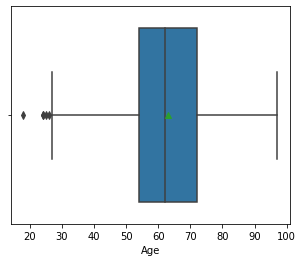

In [95]:
#Using Seaborn
plt.figure(figsize=(5,4))
sns.boxplot(x = 'Age', data = df, showmeans=True)
plt.show() 

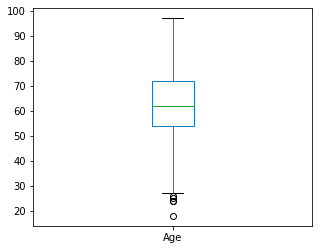

In [96]:
#Using Pandas-matplotlib
plt.figure(figsize=(5,4))
df.boxplot(column =['Age'], grid = False)
plt.show()

## Data Analysis

### Summary of data

In [97]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,2755,2752,Robert Miller,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NetWorth in billions,2755.0,NaN,NaN,NaN,4.74922,9.615358,1.0,1.5,2.3,4.2,177.0
Country,2755,70,United States,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,2755,924,real estate,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,2755.0,NaN,NaN,NaN,1345.663521,772.669811,1.0,680.0,1362.0,2035.0,2674.0
Age,2755.0,NaN,NaN,NaN,63.014519,13.259017,18.0,54.0,62.0,72.0,97.0
Industry,2755,18,Finance & Investments,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry_Encode,2755.0,NaN,NaN,NaN,6.546642,5.005253,0.0,2.0,5.0,11.0,17.0


In [98]:
df[['NetWorth in billions','Age']].describe()

,NetWorth in billions,Age
count,2755.000000,2755.000000
mean,4.749220,63.014519
std,9.615358,13.259017
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,62.000000
75%,4.200000,72.000000
max,177.000000,97.000000


#### Distribution of Age variable

#### distplot

<Figure size 360x288 with 0 Axes>

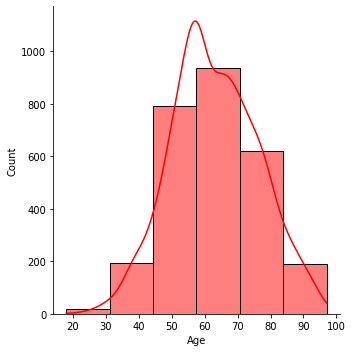

In [60]:
# Using seaborn
plt.figure(figsize=(5,4))
sns.displot(df["Age"],kde =True, color = 'red',bins=6)
plt.show()

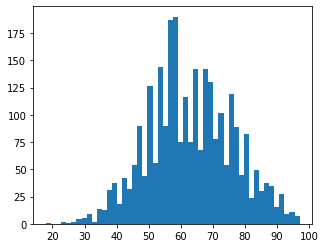

In [20]:
#Using Pandas-matplotlib
plt.figure(figsize=(5,4))
df["Age"].hist(bins=50,grid = False)
plt.show()

#### Which 5 countries have the maximum billiionaries?

In [61]:
df["Country"].value_counts().head()

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

#### Which countries do the 5 youngest billionaires belong to?

In [62]:
df.sort_values(by = 'Age').head(10)["Country"]

940           Germany
2143           Norway
2122            China
2144           Norway
1338    United States
661            Norway
1596    United States
1645    United States
274     United States
1328        Hong Kong
Name: Country, dtype: object

In [23]:
df.sort_values(by = 'Age').head(5)['Country'].unique()

array(['Germany', 'Norway', 'China', 'United States'], dtype=object)

#### Countplot for industry

C:\Users\amish_0v31o8z\miniconda3\envs\py_mitidss\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


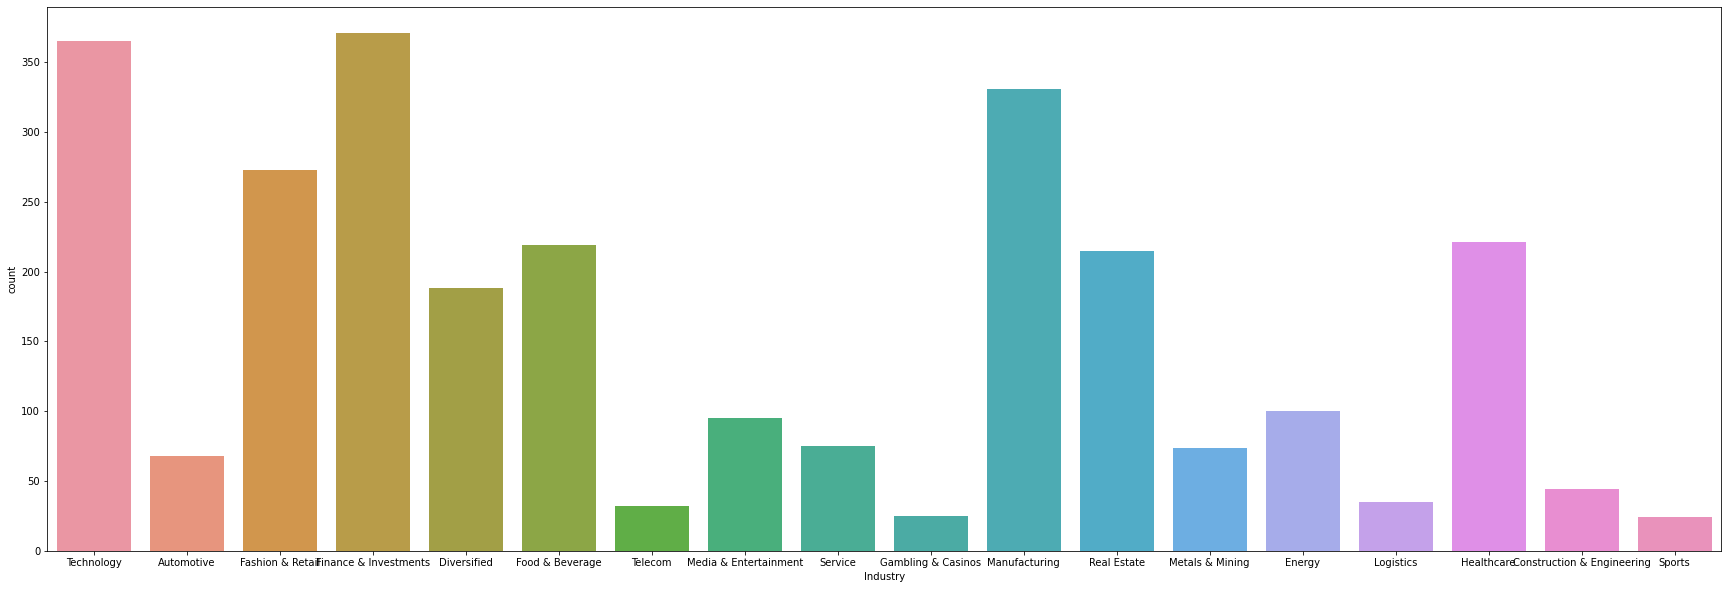

In [33]:
#using seaborn
plt.figure(figsize=(30,10))
sns.countplot(df['Industry'])
plt.show()

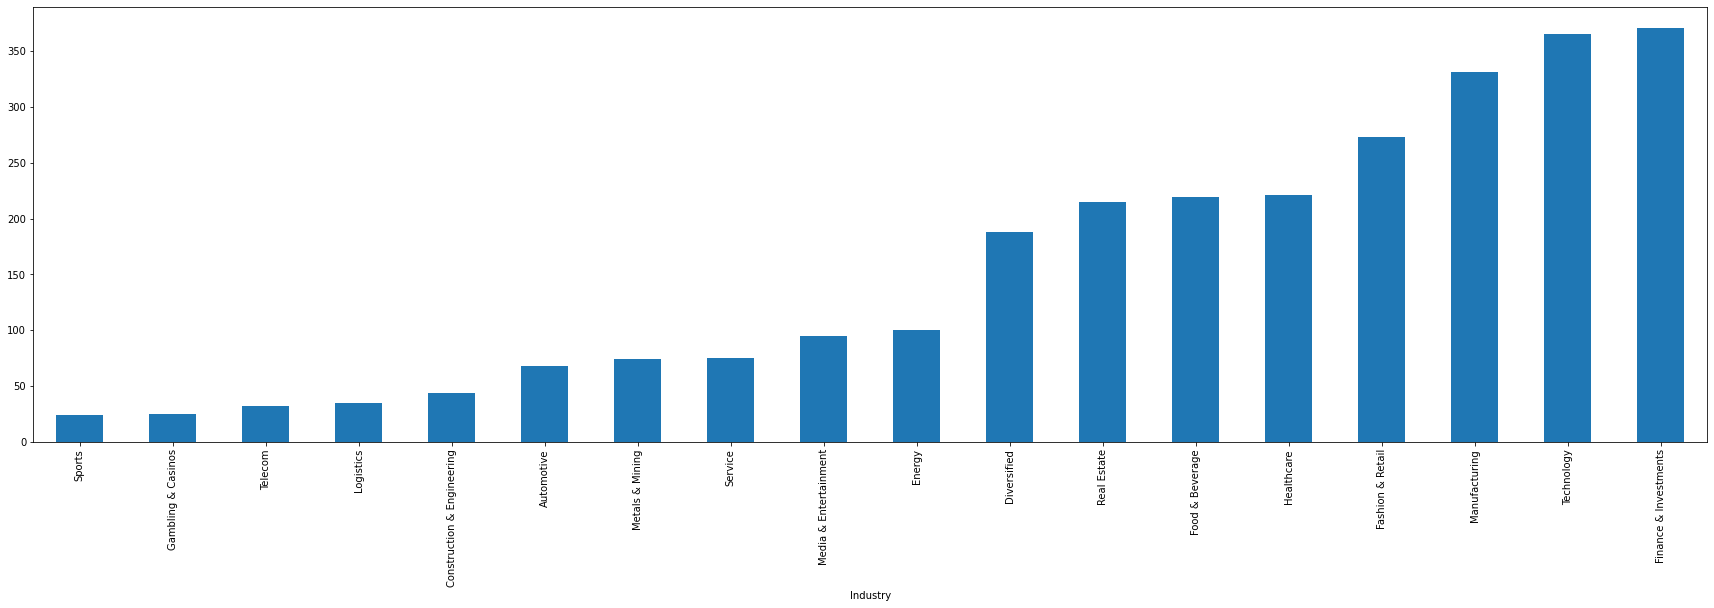

In [25]:
#Using Pandas-matplotlib
plt.figure(figsize=(30,8))
df.groupby(["Industry"])["Name"].count().sort_values().plot.bar()
plt.show()

In [106]:
df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

#### Name all the billionaires in India who are younger than 50 years. 

In [109]:
Indian_billionaires = df[df['Country']=='India']
Indian_billionaires

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry,Industry_Encode
9,Mukesh Ambani,84.5,India,diversified,10,63,Diversified,4
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58,Diversified,4
71,Shiv Nadar,23.5,India,software services,71,75,Technology,0
116,Radhakishan Damani,16.5,India,"retail, investments",117,66,Fashion & Retail,2
122,Uday Kotak,15.9,India,banking,121,62,Finance & Investments,3
...,...,...,...,...,...,...,...,...
2683,Ramesh Kumar Dua,1.0,India,footwear,2674,67,Fashion & Retail,2
2698,Ashok Kajaria,1.0,India,tiles,2674,73,Manufacturing,10
2699,T.S. Kalyanaraman,1.0,India,jewelry,2674,73,Fashion & Retail,2
2712,Rafique Malik,1.0,India,footwear,2674,70,Fashion & Retail,2


In [112]:
#Alternate way to run query on above cell using df.loc way on indexing selecting Name column only
df.loc[df['Country']=='India',['Name']]

,Name
9,Mukesh Ambani
23,Gautam Adani & family
71,Shiv Nadar
116,Radhakishan Damani
122,Uday Kotak
...,...
2683,Ramesh Kumar Dua
2698,Ashok Kajaria
2699,T.S. Kalyanaraman
2712,Rafique Malik


In [113]:
print('The names of the Indian Billionaires under the age of 50 are:')
Indian_billionaires[Indian_billionaires['Age']<50]['Name'].values

The names of the Indian Billionaires under the age of 50 are:


array(['Byju Raveendran and Divya Gokulnath', 'Vijay Shekhar Sharma',
       'Acharya Balkrishna', 'Radha Vembu', 'Ranjan Pai', 'Sachin Bansal',
       'Binny Bansal', 'Sekar Vembu'], dtype=object)

In [114]:
df_pivot = pd.pivot_table(df,index=["Country","Industry"],values=["Age","NetWorth in billions"],
...                     aggfunc={'Age': np.mean,
...                              'NetWorth in billions': np.mean}).reset_index()

In [115]:
df_pivot.loc[df_pivot["Country"] == "India"].sort_values(by="NetWorth in billions")

,Country,Industry,Age,NetWorth in billions
150,India,Construction & Engineering,66.200000,1.860000
152,India,Energy,51.000000,2.000000
155,India,Food & Beverage,69.800000,2.360000
161,India,Service,54.000000,2.575000
158,India,Media & Entertainment,55.000000,2.600000
160,India,Real Estate,70.375000,2.637500
157,India,Manufacturing,69.962963,2.696296
149,India,Automotive,73.000000,2.866667
153,India,Fashion & Retail,67.769231,3.130769
156,India,Healthcare,70.125000,3.504167


#### Pieplot

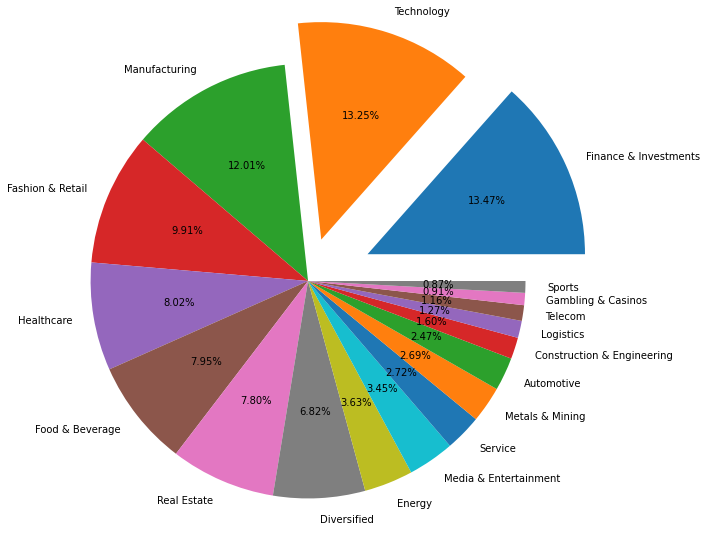

In [36]:
# Seaborn doesnt have pieplot function
# Using Pandas-matplotlib that has a pieplot function
plt.figure(figsize=(11,10))
plt.pie(df["Industry"].value_counts(), labels=df["Industry"].value_counts().index, autopct='%.2f%%', 
        explode = (0.3,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
# autopct="%.2f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode is used here to take the 'Finance & Investment'(30%) of the pie-chart
plt.show()

#### To check the age distribution by Industry

#### Use boxplot

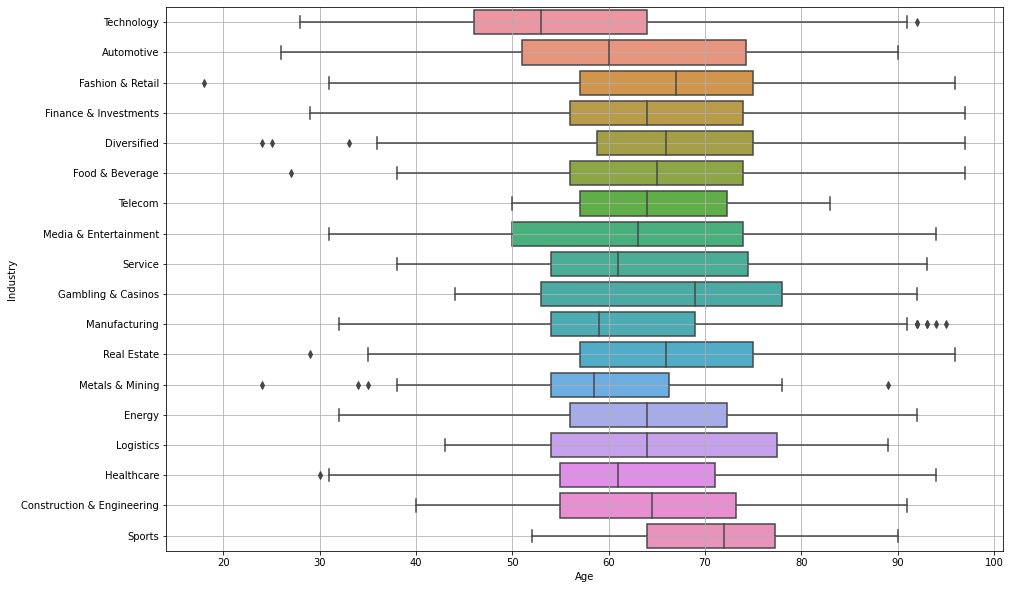

In [42]:
#Using seaborn
plt.figure(figsize=(15,10))
sns.boxplot(x= 'Age', y='Industry', data=df)
plt.grid()
plt.show()

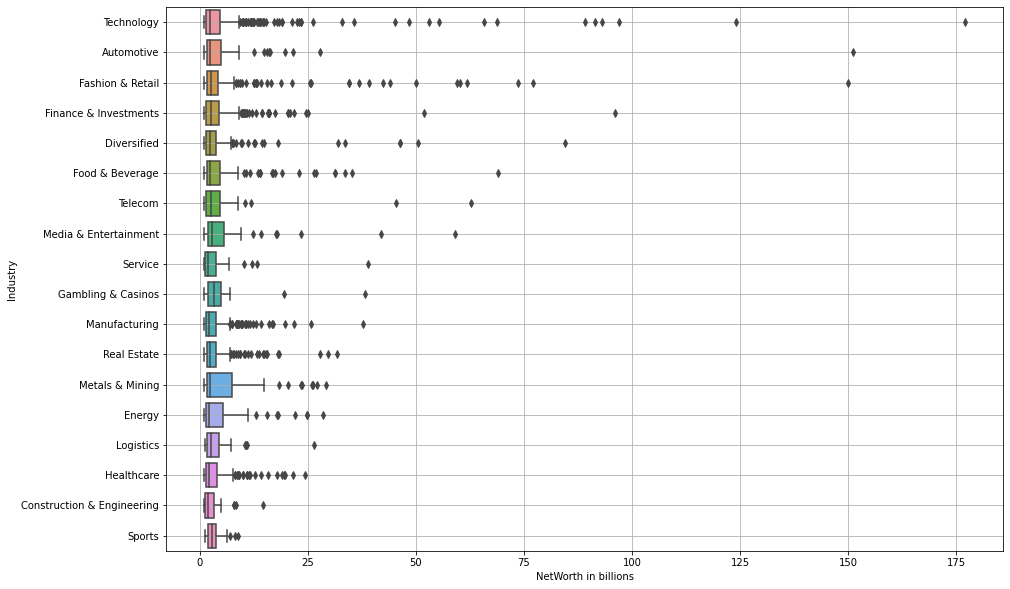

In [41]:
#Using Pandas-matplotlib
plt.figure(figsize=(15,10))
sns.boxplot(x= 'NetWorth in billions', y='Industry', data=df)
plt.grid()
plt.show()
# Will Industry be a good feature to predict Networth ? 

#### Use Strip Plot

Plot a strip plot to check the relationship between the variables 'Rank' and 'Age'


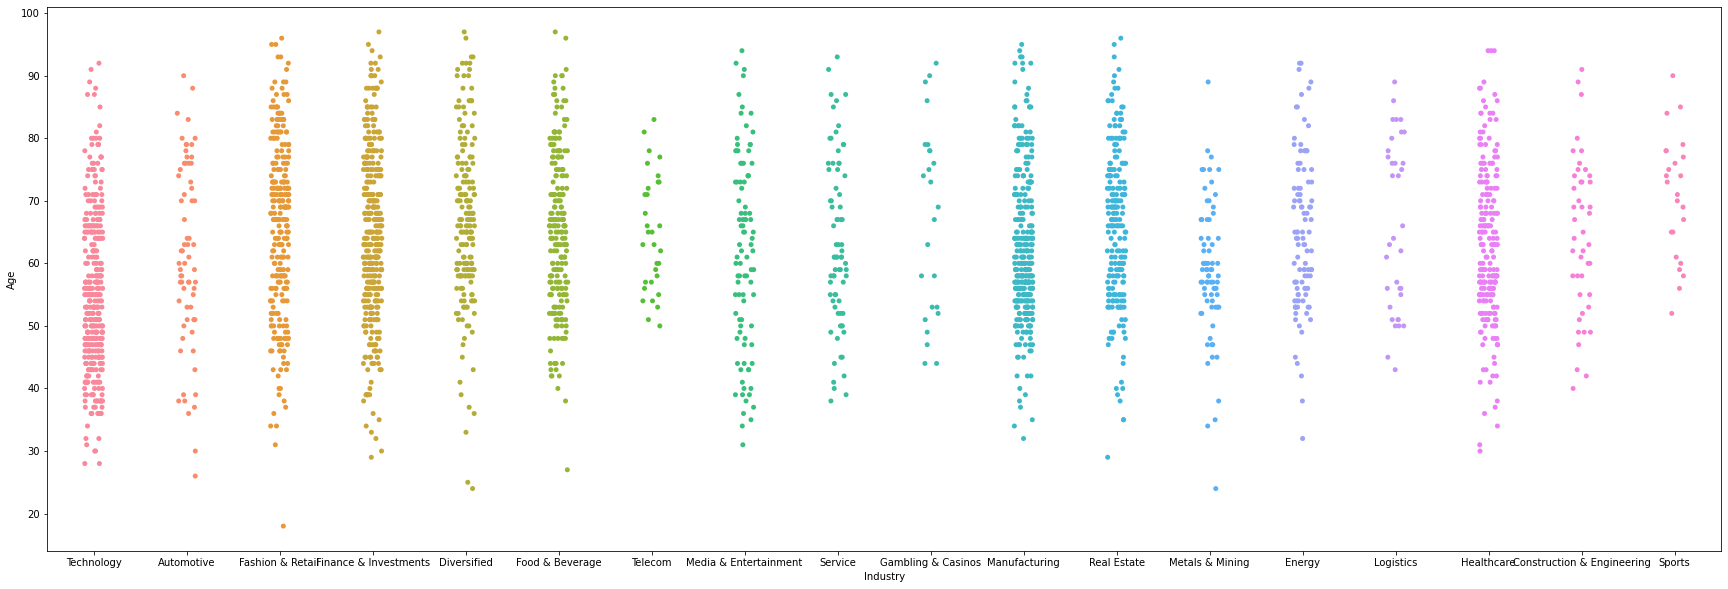

In [38]:
# strip plot - using seaborn
plt.figure(figsize=(30,10))
sns.stripplot(x = 'Industry', y = 'Age', data = df)

# display the plot
plt.show()

#### Scatterplot

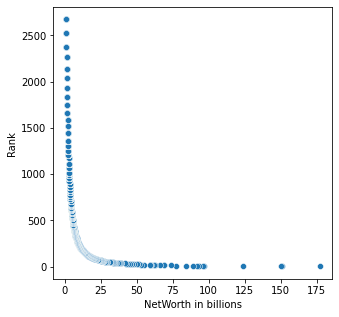

In [44]:
# Scatter Plot
plt.figure(figsize = (5,5))
sns.scatterplot(data = df, x = "NetWorth in billions", y = "Rank")
plt.show()

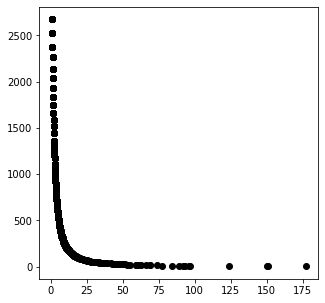

In [47]:
##Using Pandas-matplotlib
plt.figure(figsize = (5,5))
plt.plot(df["NetWorth in billions"], df["Rank"], 'o', color='black');
plt.show()

<Figure size 576x576 with 0 Axes>

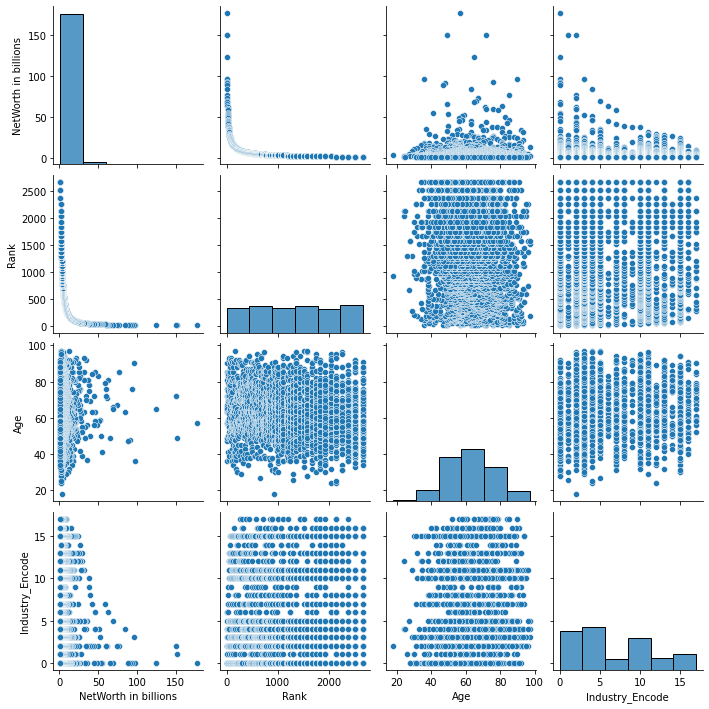

In [116]:
#Using seaborn
plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(data=df,diag_kws={'bins':6})

# display the plot
plt.show()

#### Heatmap

In [117]:
# compute correlation
corr_matrix = df.corr()

corr_matrix

,NetWorth in billions,Rank,Age,Industry_Encode
NetWorth in billions,1.000000,-0.475346,0.035225,-0.092362
Rank,-0.475346,1.000000,-0.104220,0.040683
Age,0.035225,-0.104220,1.000000,0.086919
Industry_Encode,-0.092362,0.040683,0.086919,1.000000


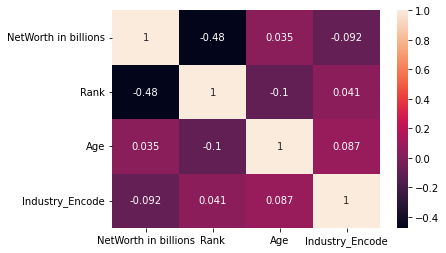

In [118]:
# plot heatmap
# 'annot=True' returns the correlation values 
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

### Convert Pandas to Numpy

In [45]:
df_numpy = df.values

In [46]:
type(df_numpy)

numpy.ndarray

In [47]:
df_numpy[:5]

array([['Jeff Bezos', 177.0, 'United States', 'Amazon', 1, 57,
        'Technology', 0],
       ['Elon Musk', 151.0, 'United States', 'Tesla, SpaceX', 2, 49,
        'Automotive', 1],
       ['Bernard Arnault & family', 150.0, 'France', 'LVMH', 3, 72,
        'Fashion & Retail', 2],
       ['Bill Gates', 124.0, 'United States', 'Microsoft', 4, 65,
        'Technology', 0],
       ['Mark Zuckerberg', 97.0, 'United States', 'Facebook', 5, 36,
        'Technology', 0]], dtype=object)

In [48]:
np.mean(df_numpy[:,1])

4.749219600725962

### Convert Numpy to Pandas

In [51]:
df_pandas = pd.DataFrame(df_numpy,columns=df.columns)

In [52]:
df_pandas.head(5)

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry,Industry_Encode
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology,0
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive,1
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail,2
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology,0
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology,0


## Happy Learning!